Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\tkinter\__init__.py", line 862, in callit
    func(*args)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\1163017751.py", line 421, in refresh_badge
    update_notification_badge()
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14628\1163017751.py", line 375, in update_notification_badge
    total_tasks = task_listbox.size()
                  ^^^^^^^^^^^^
NameError: name 'task_listbox' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\tkinter\__init__.py", line 862, in callit
    func(*args)
  File "C:\Users\Lenovo\AppData\Local

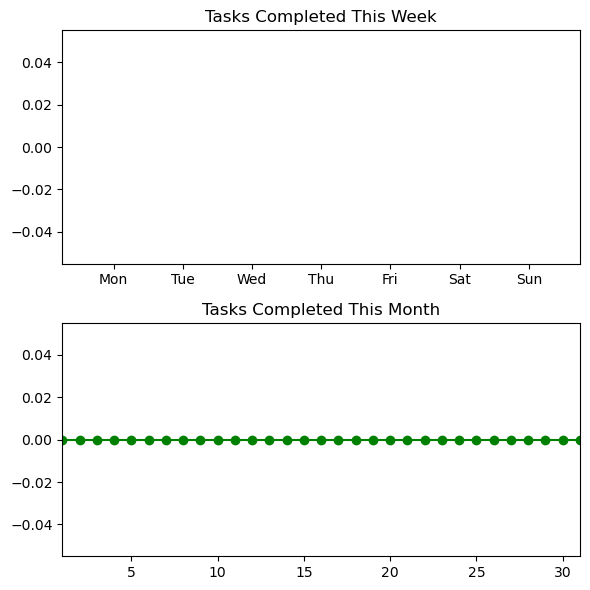

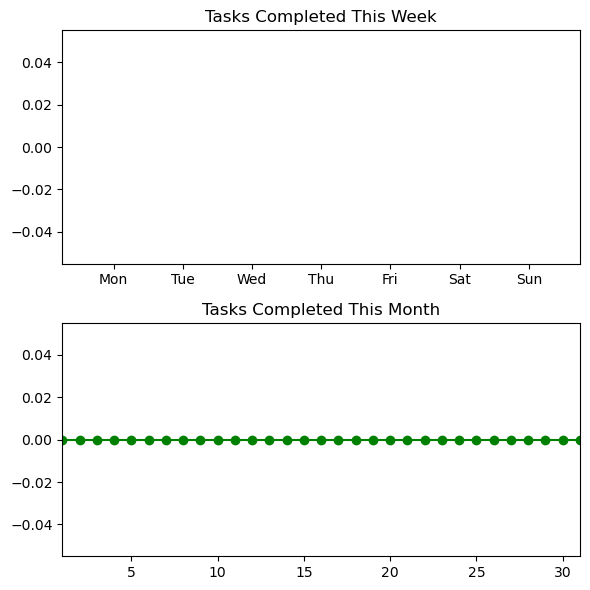

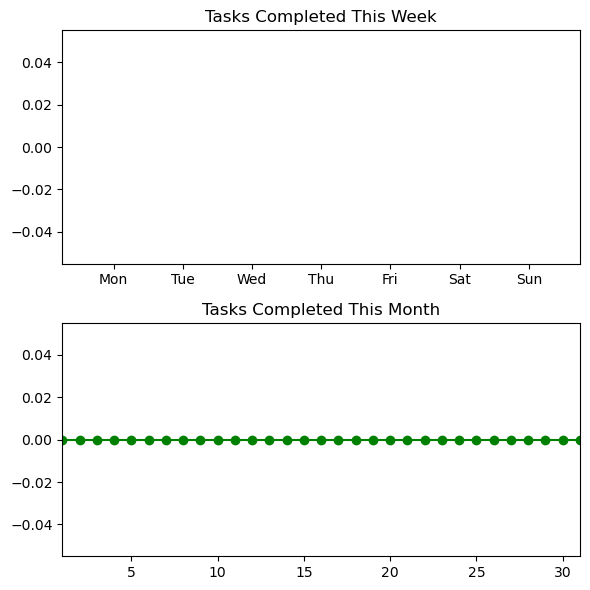

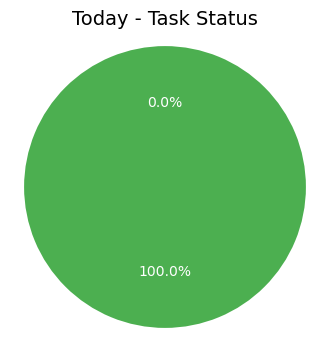

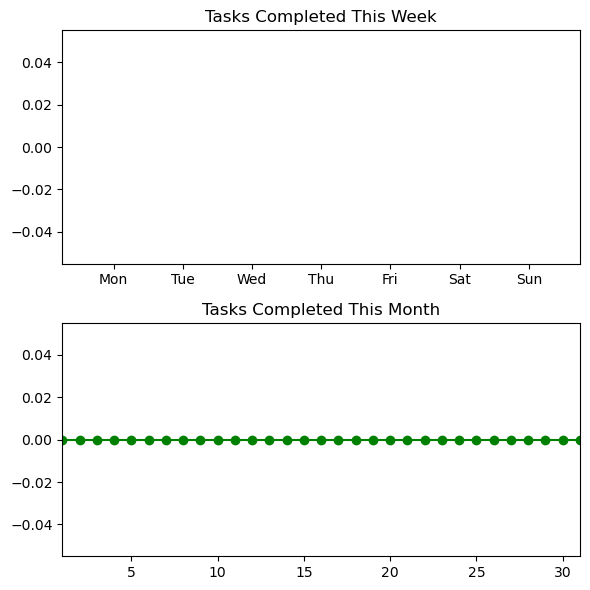

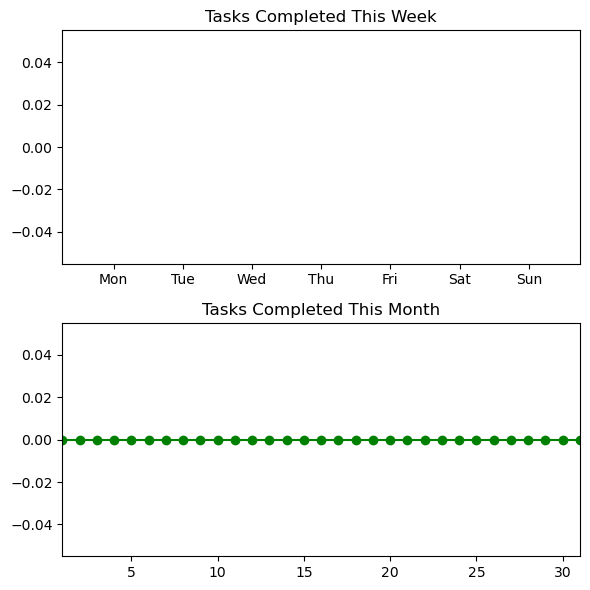

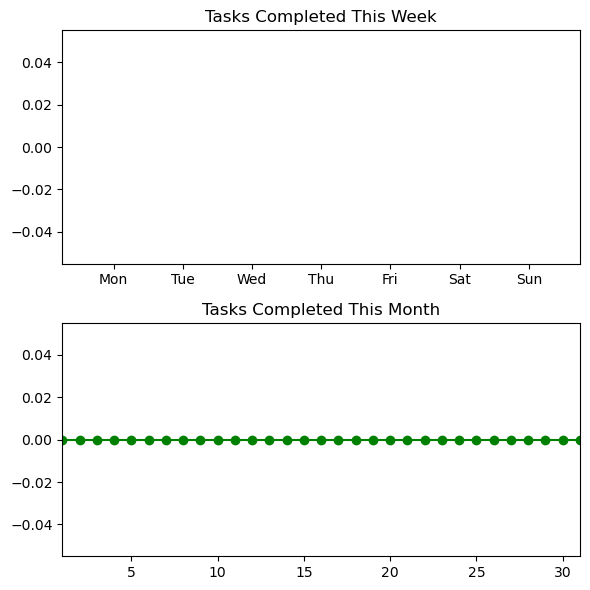

In [7]:
import tkinter as tk
from tkinter import simpledialog, messagebox, ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkcalendar import Calendar
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

root = tk.Tk()
root.title("Smart To-Do List")
root.geometry("800x600")
root.configure(bg="white")

# ===== Task storage =====
tasks_by_category = {
    "Today": [],
    "Upcoming": [],
    "Personal": [],
    "Important": [],
    "Family": [],
    "Work": []
}
current_category = "Today"
selected_task_index = None

# ===== Left Panel (Categories) =====
left_frame = tk.Frame(root, bg="white")
left_frame.grid(row=0, column=0, rowspan=3, sticky="ns", padx=10, pady=10)
def show_performance():
    # Replace this with the actual code you want to run on clicking the performance button
    from tkinter import messagebox
    messagebox.showinfo("Performance", "Performance details will be shown here.")

    # Replace this with the actual code you want to run on clicking the performance button
    from tkinter import messagebox
    messagebox.showinfo("Performance", "Performance details will be shown here.")

category_colors = {
    "Today": "#FF6B6B",
    "Upcoming": "#4ECDC4",
    "Personal": "#1A535C",
    "Important": "#FFA726",
    "Family": "#9575CD",
    "Work": "#29B6F6"
}

def load_tasks(category):
    global current_category, selected_task_index
    current_category = category
    selected_task_index = None
    update_task_display()

category_buttons = {}
for i, (name, color) in enumerate(category_colors.items()):
    btn = tk.Button(left_frame, text=name, bg=color, fg="white", width=14,
                    height=2, font=("Arial", 18, "bold"),
                    command=lambda n=name: load_tasks(n))
    btn.grid(row=i, column=0, pady=5)
    category_buttons[name] = btn

# ===== Top Buttons (Symbols) =====
top_frame = tk.Frame(root, bg="white")
top_frame.grid(row=0, column=1, sticky="ew", pady=10)

def add_task():
    def save_task():
        title = entry.get().strip()
        if not title:
            messagebox.showwarning("Empty Title", "Please enter a task title!")
            return
        date, time = None, None
        if current_category in ["Upcoming", "Today"]:
            date = simpledialog.askstring("Add Task", "Enter due date (YYYY-MM-DD) (optional):")
            time = simpledialog.askstring("Add Task", "Enter due time (optional):")
        tasks_by_category[current_category].append({
            "title": title,
            "date": date,
            "time": time,
            "important": False,
            "done": False
        })
        popup.destroy()
        update_task_display()

    popup = tk.Toplevel(root)
    popup.title("New Task")
    popup.geometry("400x200")
    popup.configure(bg="white")
    popup.transient(root)  # Make modal
    popup.grab_set()       # Prevent interaction with main window

    # Center it on screen
    popup.update_idletasks()
    x = (popup.winfo_screenwidth() - popup.winfo_width()) // 2
    y = (popup.winfo_screenheight() - popup.winfo_height()) // 3
    popup.geometry(f"+{x}+{y}")

    # Label
    label = tk.Label(popup, text="Enter Task Title", font=("Segoe UI", 20, "bold"), bg="white", fg="black")
    label.pack(pady=(30, 10))

    # Entry
    entry = tk.Entry(popup, font=("Segoe UI", 16), width=30, justify="center", bd=2, relief="solid")
    entry.pack(pady=(0, 20))
    entry.focus_set()

    # Save Button
    save_btn = tk.Button(popup, text="Save", font=("Segoe UI", 14, "bold"), bg="#4ECDC4", fg="white",
                         activebackground="#3bbdb3", width=10, height=1, relief="flat", command=save_task)
    save_btn.pack()

    # Handle Enter key
    popup.bind("<Return>", lambda event: save_task())
    
selected_task_index = None  # To track which task is currently selected
    
def update_task_display():
    global task_widgets, selected_task_index
    for widget in task_widgets:
        widget.destroy()
    task_widgets = []

    lbl = tk.Label(task_frame, text=f"{current_category} Tasks", font=("Helvetica", 16, "bold"), bg="white")
    lbl.grid(row=0, column=0, columnspan=2, pady=10)
    task_widgets.append(lbl)

    for i, task in enumerate(tasks_by_category[current_category]):
        task_str = task["title"]
        if task["important"]:
            task_str = "★ " + task_str
        if task["date"]:
            task_str += f" | {task['date']}"
        if task["time"]:
            task_str += f" at {task['time']}"

        var = tk.BooleanVar(value=task["done"])

        def check_task_done(i=i, var=var):
            tasks_by_category[current_category][i]["done"] = var.get()
            update_task_display()

        cb = tk.Checkbutton(task_frame, variable=var, bg="white", anchor="w",
                            font=("Arial", 12), command=check_task_done)

        # Instead of text on Checkbutton, put an adjacent label for better click handling
        cb.grid(row=i+1, column=0, sticky="w", padx=10, pady=5)
        task_widgets.append(cb)

        lbl_task = tk.Label(task_frame, text=task_str, bg="white", anchor="w",
                            font=("Arial", 12))
        lbl_task.grid(row=i+1, column=1, sticky="w", padx=5)

        # Highlight if selected
        if selected_task_index == i:
            lbl_task.config(bg="#D3E4CD")  # light greenish highlight

        def on_task_click(event, index=i):
            global selected_task_index
            selected_task_index = index
            update_task_display()

        lbl_task.bind("<Button-1>", on_task_click)

def star_task():
    global selected_task_index
    if selected_task_index is not None:
        current_status = tasks_by_category[current_category][selected_task_index]["important"]
        tasks_by_category[current_category][selected_task_index]["important"] = not current_status
        update_task_display()

def edit_task():
    global selected_task_index
    if selected_task_index is not None:
        task = tasks_by_category[current_category][selected_task_index]
        new_title = simpledialog.askstring("Edit Task", "Edit title:", initialvalue=task["title"])
        if new_title:
            task["title"] = new_title
            update_task_display()

def delete_task():
    global selected_task_index
    if selected_task_index is not None:
        del tasks_by_category[current_category][selected_task_index]
        selected_task_index = None
        update_task_display()

symbols = [
    ("➕", add_task), ("★", star_task),
    ("✏", edit_task), ("➖", delete_task)
]

for i, (symbol, command) in enumerate(symbols):
    btn = tk.Button(top_frame, text=symbol, font=("Arial", 14), bg="#f0f0f0", width=4, command=command)
    btn.grid(row=0, column=i, padx=20)

# ===== Task Display =====
task_frame = tk.Frame(root, bg="white")
task_frame.grid(row=1, column=1, sticky="nsew", padx=20)

task_widgets = []

def update_task_display():
    global task_widgets, selected_task_index
    for widget in task_widgets:
        widget.destroy()
    task_widgets = []

    lbl = tk.Label(task_frame, text=f"{current_category} Tasks", font=("Helvetica", 16, "bold"), bg="white")
    lbl.grid(row=0, column=0, columnspan=2, pady=10)
    task_widgets.append(lbl)

    for i, task in enumerate(tasks_by_category[current_category]):
        task_str = task["title"]
        if task["important"]:
            task_str = "★ " + task_str
        if task["date"]:
            task_str += f" | {task['date']}"
        if task["time"]:
            task_str += f" at {task['time']}"

        var = tk.BooleanVar(value=task["done"])
        def check_task_done(i=i, var=var):
            tasks_by_category[current_category][i]["done"] = var.get()
            update_task_display()

        cb = tk.Checkbutton(task_frame, text=task_str, variable=var, bg="white", anchor="w",
                            font=("Arial", 12), command=check_task_done)
        cb.grid(row=i+1, column=0, sticky="w", padx=10, pady=5)
        task_widgets.append(cb)

        # To select task on click, separate from checkbox toggle
        def select_task(event, index=i):
            global selected_task_index
            selected_task_index = index
            update_task_display()  # To highlight or reflect selection if needed

        cb.bind("<Button-3>", select_task)  # Use right-click to select task (avoid conflict with checkbox toggle)

# ===== Bottom Bar =====
bottom_frame = tk.Frame(root, bg="white")
bottom_frame.grid(row=2, column=1, sticky="ew", pady=15)

def show_completed():
    total = len(tasks_by_category[current_category])
    done = sum(1 for t in tasks_by_category[current_category] if t["done"])
    pending = total - done

    chart_window = tk.Toplevel(root)
    chart_window.title("Task Completion Overview")
    chart_window.geometry("400x450")
    chart_window.configure(bg="white")

    # Pie chart
    fig, ax = plt.subplots(figsize=(4, 4))
    labels = ["Completed", "Pending"]
    sizes = [done, pending]
    colors = ["#4CAF50", "#FF6B6B"]

    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct="%1.1f%%",
                                      colors=colors, startangle=90, textprops={'color':"white"})
    ax.axis("equal")  # Equal aspect ratio for a perfect circle
    ax.set_title(f"{current_category} - Task Status", fontsize=14)

    canvas = FigureCanvasTkAgg(fig, master=chart_window)
    canvas.draw()
    canvas.get_tk_widget().pack(pady=(20, 10))

    # Completion Label
    status_label = tk.Label(chart_window, text=f"{done} / {total} tasks completed",
                            font=("Segoe UI", 14, "bold"), bg="white", fg="#333")
    status_label.pack(pady=10)


def show_calendar():
    cal_window = tk.Toplevel(root)
    cal_window.title("Select Date to Add Task")
    cal_window.geometry("300x300")
    cal_window.configure(bg="white")

    cal = Calendar(cal_window, selectmode='day', date_pattern='yyyy-mm-dd')
    cal.pack(pady=20)

    def on_date_selected():
        selected_date = cal.get_date()
        cal_window.destroy()
        add_task_for_date(selected_date)

    select_btn = ttk.Button(cal_window, text="Add Task to This Date", command=on_date_selected)
    select_btn.pack(pady=10)

# Tasks stored by date (for calendar added tasks)
tasks_by_date = {}

def add_task_for_date(date):
    popup = tk.Toplevel(root)
    popup.title(f"Add Task - {date}")
    popup.geometry("300x150")
    popup.configure(bg="white")

    label = tk.Label(popup, text="Task Name:", font=("Segoe UI", 10), bg="white")
    label.pack(pady=5)

    task_entry = ttk.Entry(popup, width=30)
    task_entry.pack(pady=5)
    task_entry.focus_set()

    def save():
        task_name = task_entry.get().strip()
        if not task_name:
            messagebox.showwarning("Empty Task", "Please enter task name")
            return
        # Save the task for that date
        if date not in tasks_by_date:
            tasks_by_date[date] = []
        tasks_by_date[date].append({"title": task_name, "done": False})
        popup.destroy()
        messagebox.showinfo("Saved", f"Task added for {date}")

    save_btn = ttk.Button(popup, text="Save", command=save)
    save_btn.pack(pady=10)

def show_notifications():
    notif_window = tk.Toplevel(root)
    notif_window.title("Notifications")
    notif_window.geometry("350x400")
    notif_window.configure(bg="white")

    notif_label = tk.Label(notif_window, text="Important & Upcoming Tasks", font=("Arial", 14, "bold"), bg="white")
    notif_label.pack(pady=10)

    today = datetime.date.today()
    upcoming_tasks = []

    # Gather tasks due today or important tasks
    for category, tasks in tasks_by_category.items():
        for t in tasks:
            if t["important"]:
                upcoming_tasks.append(f"[{category}] {t['title']}")
            elif t.get("date"):
                try:
                    due_date = datetime.datetime.strptime(t["date"], "%Y-%m-%d").date()
                    if 0 <= (due_date - today).days <= 3:
                        upcoming_tasks.append(f"[{category}] {t['title']} (Due: {t['date']})")
                except Exception:
                    pass

    if not upcoming_tasks:
        tk.Label(notif_window, text="No notifications at the moment.", bg="white").pack(pady=20)
    else:
        for ut in upcoming_tasks:
            tk.Label(notif_window, text=ut, bg="white", anchor="w").pack(fill="x", padx=10, pady=5)


# Notification count variable
notif_count_var = tk.StringVar(value="")

def get_notification_count():
    today = datetime.date.today()
    count = 0
    for category, tasks in tasks_by_category.items():
        for t in tasks:
            if t["important"]:
                count += 1
            elif t.get("date"):
                try:
                    due_date = datetime.datetime.strptime(t["date"], "%Y-%m-%d").date()
                    if 0 <= (due_date - today).days <= 3:
                        count += 1
                except Exception:
                    pass
    return count

def update_notification_badge():
    total_tasks = task_listbox.size()
    completed = 0
    for i in range(total_tasks):
        if task_listbox.get(i).startswith("✓"):
            completed += 1
    pending = total_tasks - completed

    # Update bell icon with count
    bell_symbol = f"🔔 {pending}"
    notification_button.config(text=bell_symbol)


def on_notifications_click():
    show_notifications()
    # After viewing notifications, you might want to update badge (optional)
    update_notification_badge()

# Bottom buttons
bottom_buttons = [
    ("☰", lambda: messagebox.showinfo("Menu", "Categories are on the left panel")),
    ("⌛", show_completed),
    ("📅", show_calendar),
    ("🔔", on_notifications_click),
    ("📊", show_performance)
]

button_widgets = []
for i, (symbol, command) in enumerate(bottom_buttons):
    btn = tk.Button(bottom_frame, text=symbol, font=("Arial", 18), bg="white", width=3, command=command)
    btn.grid(row=0, column=i, padx=15)
    button_widgets.append(btn)

# Create notification badge label on top of 🔔 button (4th button)
notif_badge = tk.Label(bottom_frame, textvariable=notif_count_var, bg="red", fg="white",
                       font=("Arial", 10, "bold"), width=2, height=1)
notif_badge.place_forget()  # initially hidden

# Position badge relative to 🔔 button
def position_badge():
    btn = button_widgets[3]  # 🔔 button
    x = btn.winfo_x() + btn.winfo_width() - 15
    y = btn.winfo_y() + 5
    notif_badge.place(x=x, y=y)

# Update badge after window initializes and whenever needed
def refresh_badge():
    update_notification_badge()
    position_badge()

root.after(200, refresh_badge)

# Optional: Update badge periodically (e.g., every 10 sec)
def periodic_update():
    refresh_badge()
    root.after(10000, periodic_update)

root.after(10000, periodic_update)


# Dictionary to store completion data
completed_tasks_by_date = defaultdict(int)

# When you mark a task as completed, also store its completion date
def mark_task_completed():
    selected = task_listbox.curselection()
    if selected:
        index = selected[0]
        task_text = task_listbox.get(index)
        if not task_text.startswith("✓"):
            task_listbox.delete(index)
            completed_text = f"✓ {task_text}"
            task_listbox.insert(index, completed_text)

            # Log the current date for performance tracking
            today = datetime.now().strftime("%Y-%m-%d")
            completed_tasks_by_date[today] += 1

            update_notification_badge()

# Show bar graph of task completion performance
def show_performance():
    today = datetime.today()
    weekly = [0] * 7
    monthly = [0] * 31

    for cat in tasks_by_category.values():
        for task in cat:
            if task["done"] and task["date"]:
                try:
                    task_date = datetime.strptime(task["date"], "%m/%d/%y")
                    delta = (today - task_date).days
                    if 0 <= delta < 7:
                        weekly[task_date.weekday()] += 1
                    if task_date.month == today.month:
                        monthly[task_date.day - 1] += 1
                except:
                    continue

    graph_win = tk.Toplevel(root)
    graph_win.title("Performance Stats")

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
    ax1.bar(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], weekly, color="skyblue")
    ax1.set_title("Tasks Completed This Week")
    ax2.plot(range(1, 32), monthly, marker="o", color="green")
    ax2.set_title("Tasks Completed This Month")
    ax2.set_xlim(1, 31)
    plt.tight_layout()

    canvas = FigureCanvasTkAgg(fig, master=graph_win)
    canvas.draw()
    canvas.get_tk_widget().pack()


# Create notification_button separately so we can update it
bottom_buttons = [
    ("☰", lambda: messagebox.showinfo("Menu", "Categories are on the left panel")),
    ("⌛", show_completed),
    ("📅", show_calendar),
    ("🔔", on_notifications_click),
    ("📊", show_performance)
]

for i, (symbol, command) in enumerate(bottom_buttons):
    btn = tk.Button(bottom_frame, text=symbol, font=("Arial", 18), bg="white", width=3, command=command)
    btn.grid(row=0, column=i, padx=15)

# ===== Grid configuration =====
root.grid_columnconfigure(1, weight=1)
root.grid_rowconfigure(1, weight=1)

# Load initial tasks view
load_tasks(current_category)

root.mainloop()
